In [5]:
from pymagdisc.bfield.magneticField3D import dipoleMagneticField3D, _calc_posn
import numpy as np
import matplotlib.pyplot as plt

# Plot the L=1 shell of a centred dipole with magnetic moment vector [0,0,1]

(Text(0.5, 0, 'x'), Text(0.5, 0, 'y'), Text(0.5, 0, 'z'))

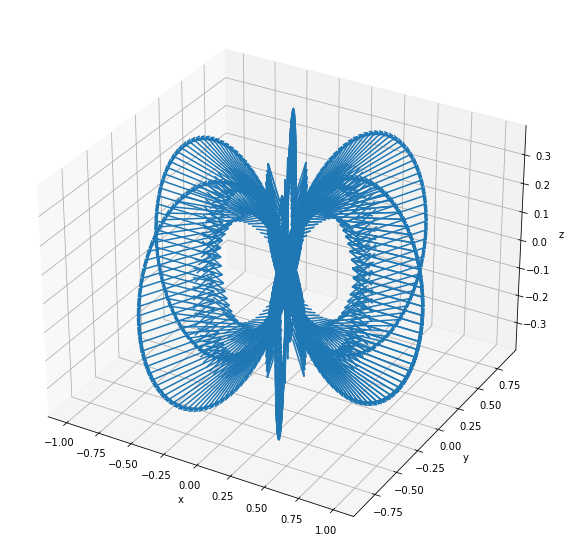

In [6]:
Md = [0,0,1] # magnetic moment aligned to z
Rd = [0,0,0] # no offset
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d', )

for p in np.linspace(0, 2*np.pi, 7):
    t = np.linspace(-np.pi/2, np.pi/2, 100)
    L = 1
    r = L * np.cos(t) ** 2
    ir = np.argwhere(r>=0.1).reshape(-1)
    x = r[ir] * np.cos(t[ir]) * np.cos(p)
    y = r[ir] * np.cos(t[ir]) * np.sin(p)
    z = r[ir] * np.sin(t[ir])
    B, gradB = dipoleMagneticField3D(Md, Rd, [x,y,z])
    b = np.sqrt(B[0]**2 + B[1]**2 + B[2]**2)
    ax.quiver(x, y, z, B[0]/b, B[1]/b, B[2]/b, length=0.1, normalize=True)
    db = np.sqrt(gradB[0]**2 + gradB[1]**2 + gradB[2]**2)
    ax.quiver(x, y, z, gradB[0]/db , gradB[1]/db, gradB[2]/db, length=0.5)

ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('z')



# Test calculation of B in Cartesian from polar coordinates

In [7]:
m, rm, r = Md, Rd, [x,y,z]

# Get position variables
m, rm, r, X, Y, Z, r0, rnorm, R, R2, R3 = _calc_posn(m, rm, r)

# Use the dipoleMagneticField3D function to calculate the field
B, gradB = dipoleMagneticField3D(m, rm, r)


In [8]:
# radial distance from z-axis in cylindrical coord
Rcyl = np.sqrt(X**2 + Y**2)

# colatitude
theta = np.pi/2-np.arctan2(Z, Rcyl)

# cos and sin of colatitude
cost = Z/R
sint = np.sqrt(1-cost**2)

# B radial and tangential
Br = m[2] / R3 * 2 * cost
Bt = m[2] / R3 * sint

# cos and sin of latitude
coslat = Rcyl/R
sinlat = Z/R

# cos and sin of longitude
coslon = X/Rcyl
sinlon = Y/Rcyl

# B in polar to cartesian
Bx = (Br * coslat + Bt * sinlat) * coslon
By = (Br * coslat + Bt * sinlat) * sinlon
Bz = (Br * sinlat - Bt * coslat)

In [9]:
# Check the dipoleMagneticField3D is the same as B in Carteisan from polar coordinates. 
np.testing.assert_allclose(B[0], Bx, atol=1e-3, err_msg="Error in calculation of B in Cartesian from polar coordinates.")
np.testing.assert_allclose(B[2], Bz, atol=1e-3, err_msg="Error in calculation of B in Cartesian from polar coordinates.")


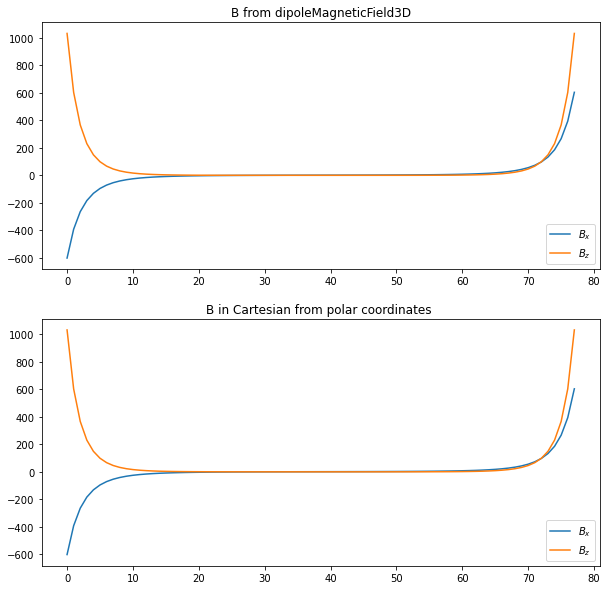

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].set_title('B from dipoleMagneticField3D')
ax[0].plot(B[0], label='$B_x$')
ax[0].plot(B[2], label='$B_z$')

ax[1].set_title('B in Cartesian from polar coordinates ')
ax[1].plot(Bx, label='$B_x$')
ax[1].plot(Bz, label='$B_z$')
[axi.legend() for axi in ax]

# Test calculation of gradient in Cartesian from gradient in polar coordinates

In [11]:
EPS = 1e-6
rp = R * (1+EPS)
rm = R *(1-EPS)
dr = 2 * R*EPS

# gradient with respect to r
dBdr = m[2]*(1/rp**3 - 1/rm**3) / dr*np.sqrt(1 + 3*cost**2)

mup = cost * (1+EPS) + EPS 
mum = cost * (1-EPS) - EPS
rdmu = R * (mup-mum)
dmudt = -np.sqrt(1-cost**2)

# gradient with respect to theta
dBdt = m[2]/R3 * (np.sqrt(1+3*mup**2) - np.sqrt(1+3*mum**2)) / rdmu*dmudt
gradBx = (dBdr * coslat+dBdt * sinlat) * coslon
gradBy = (dBdr * coslat+dBdt * sinlat) * sinlon
gradBz = (dBdr * sinlat-dBdt * coslat)



In [12]:
# Check the dipoleMagneticField3D is the same as B in Carteisan from polar coordinates. 
np.testing.assert_allclose(gradB[0], gradBx, atol=3e3, err_msg="Error in calculation of gradB in Cartesian from polar coordinates.")
np.testing.assert_allclose(gradB[2], gradBz, atol=3e3, err_msg="Error in calculation of gradB in Cartesian from polar coordinates.")

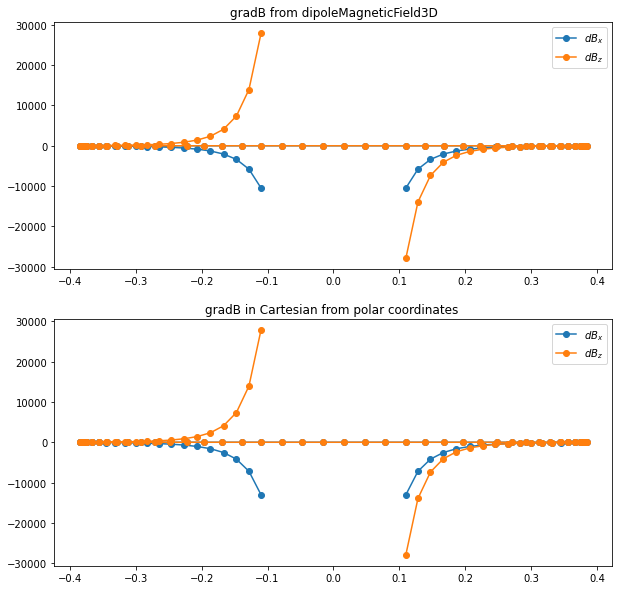

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].set_title('gradB from dipoleMagneticField3D')
ax[0].plot(Z, gradB[0], '-o', label='$dB_x$')
ax[0].plot(Z, gradB[2], '-o', label='$dB_z$')

ax[1].set_title('gradB in Cartesian from polar coordinates ')
ax[1].plot(Z, gradBx, '-o', label='$dB_x$')
ax[1].plot(Z, gradBz, '-o', label='$dB_z$')
[axi.legend() for axi in ax]
